# Hi, Hope you fine, here my first Titanic project, i could not help on titanic boat but now i am trying to add my contributions here.. ******

**Importing libraries and data , after that we will see inside that wd we have , i mean features :P ******

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [25]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
a=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**First of ALL, we have to check missing values NAN in our DATA : 
**As there are many ways to deal NAN as we will make good features to improve our accuracy : 

In [26]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

**First, we will work on just training data : **
Drop colums which are not necessary, like ticket, Names because survival did not see any name here, as we have Gender column which is enough and also other features can give good accuracy ;) 

In [27]:
train.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)


# **Missing Values Work :

In [28]:
train['Age']= train['Age'].fillna(train['Age'].mean())


In [29]:
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train.dropna(subset=['Embarked'],axis = 0 ,inplace = True)

**For Ordinal data : making dummies to make feature more clear for algo :**

In [31]:
train = pd.get_dummies(data=train, columns=['Embarked'])
train = pd.get_dummies(data=train, columns=['Sex'])

In [32]:
train['Fare'] = train['Fare'].astype(int, copy=True)
train['Age'] = train['Age'].astype(int, copy=True)

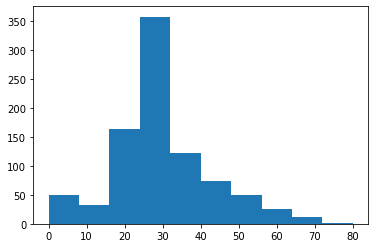

In [33]:
import matplotlib.pyplot as plt 
plt.hist(train['Age'])
plt.show()

In [34]:
bins = np.linspace(min(train['Age']), max(train['Age']), 9 )
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
train['New_age']= pd.cut(train['Age'], bins, labels=label, include_lowest=True)
train = pd.get_dummies(data=train, columns=['New_age'])

In [35]:
train.drop(['Age'], axis=1, inplace=True)


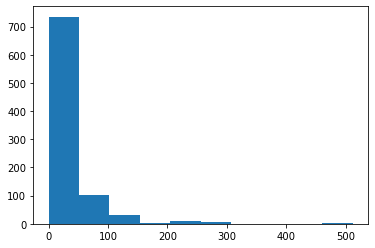

In [36]:
import matplotlib.pyplot as plt 
plt.hist(train['Fare'])
plt.show()

In [37]:
bins = np.linspace(min(train['Fare']), max(train['Fare']),  11)
label = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK']
train['New_Fare']= pd.cut(train['Fare'], bins, labels=label, include_lowest=True)
train = pd.get_dummies(data=train, columns=['New_Fare'])
train.drop(['Fare'], axis=1, inplace=True)

In [38]:
train.set_index('PassengerId',inplace = True)
train.head()

,Survived,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,New_age_A,...,New_Fare_AB,New_Fare_BC,New_Fare_CD,New_Fare_DE,New_Fare_EF,New_Fare_FG,New_Fare_GH,New_Fare_HI,New_Fare_IJ,New_Fare_JK
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,3,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


**We Can See, that our train data is clear now and just like train data, we have to clean of Test data: **

In [39]:
test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test['Age']= test['Age'].fillna(test['Age'].mean())
test.dropna(subset=['Embarked'],axis = 0 ,inplace = True)
test = pd.get_dummies(data=test, columns=['Embarked'])
test = pd.get_dummies(data=test, columns=['Sex'])
test['Fare']= test['Fare'].fillna(test['Fare'].mean())
test['Fare'] = test['Fare'].astype(int, copy=True)
test['Age'] = test['Age'].astype(int, copy=True)
bins = np.linspace(min(test['Age']), max(test['Age']), 9 )
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
test['New_age']= pd.cut(test['Age'], bins, labels=label, include_lowest=True)
test = pd.get_dummies(data=test, columns=['New_age'])
test.drop(['Age'], axis=1, inplace=True)
bins = np.linspace(min(test['Fare']), max(test['Fare']),  11)
label = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GH', 'HI', 'IJ', 'JK']
test['New_Fare']= pd.cut(test['Fare'], bins, labels=label, include_lowest=True)
test = pd.get_dummies(data=test, columns=['New_Fare'])
test.drop(['Fare'], axis=1, inplace=True)
test.set_index('PassengerId',inplace = True)
test.head()

,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,New_age_A,New_age_B,...,New_Fare_AB,New_Fare_BC,New_Fare_CD,New_Fare_DE,New_Fare_EF,New_Fare_FG,New_Fare_GH,New_Fare_HI,New_Fare_IJ,New_Fare_JK
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
893,3,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
894,2,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
895,3,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
896,3,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Now we have both test, train data, and we will fit train data into Train_X , and Train_Y .. to see how it works : Train_X data has independent feature and Train_Y has output which is dependent : 

In [40]:
X_train = train.drop(['Survived'], axis=1)
Y_train= train['Survived']


Now we will fit these X,Y in diff algorithm to check accuracies : 

In [41]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

65.58

In [42]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.96

In [43]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.96

In [44]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.4

**There**** are also good algo and we can understand data more clearly but i am new and it takes time.. **

# Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.¶